<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [101]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [99]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [100]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Familiarize yourself with the dataset

The following describes the dataset variables:
·      CRIM - per capita crime rate by town
·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
·      INDUS - proportion of non-retail business acres per town.
·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
·      NOX - nitric oxides concentration (parts per 10 million)
·      RM - average number of rooms per dwelling
·      AGE - proportion of owner-occupied units built prior to 1940
·      DIS - weighted distances to five Boston employment centres
·      RAD - index of accessibility to radial highways
·      TAX - full-value property-tax\ rate per $10,000
·      PTRATIO - pupil-teacher ratio by town
·  \%lower status of the populatione population
·      MEDV - Median value of owner-occup\ied homes in $1000's


In [7]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


# Task 2: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels
Generate the following and explain your finding
s:
•	For the "Median value of owner-occupied homes" provide a boxplot
•	Provide a bar plot for the Charles river variable
•	Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
•	Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
•	Create a histogram for the pupil to teacher ratio variable


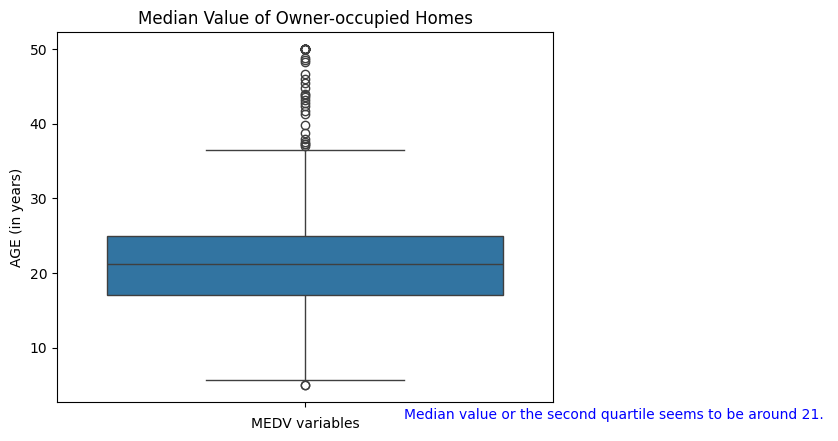

In [112]:
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set_title("Median Value of Owner-occupied Homes")
ax.set_xlabel("MEDV variables")
ax.set_ylabel("AGE (in years)")
pyplot.text(0.2, 0.45, "Median value or the second quartile seems to be around 21. ", fontsize=10, color='blue')
pyplot.show()

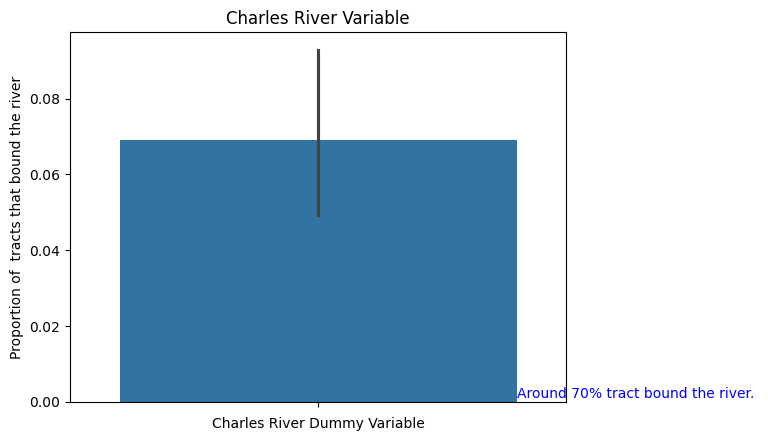

In [83]:
ax = sns.barplot(y="CHAS",  data=boston_df)
ax.set_title("Charles River Variable")
ax.set_xlabel("Charles River Dummy Variable")
ax.set_ylabel("Proportion of  tracts that bound the river")
pyplot.text(0.4, 0.001, "Around 70% tract bound the river. ", fontsize=10, color='blue')
pyplot.show()

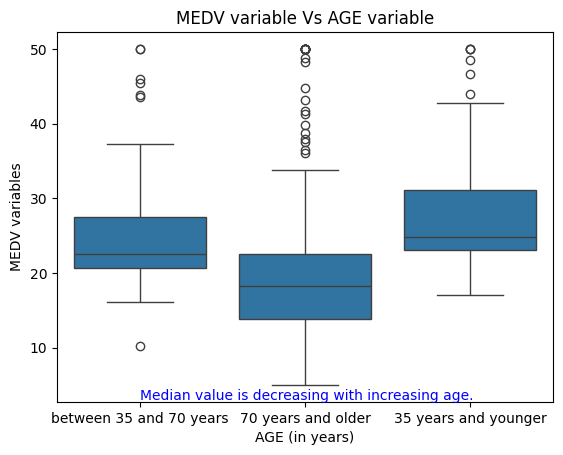

In [113]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
ax.set_title("MEDV variable Vs AGE variable")
ax.set_xlabel("AGE (in years)")
ax.set_ylabel("MEDV variables")
pyplot.text(0, 3, "Median value is decreasing with increasing age. ", fontsize=10, color='blue')
pyplot.show()

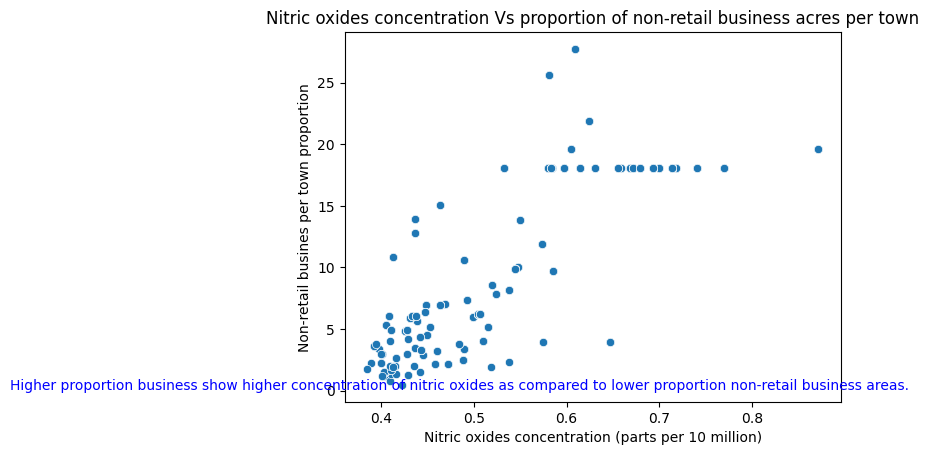

In [73]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax.set_title("Nitric oxides concentration Vs proportion of non-retail business acres per town")
ax.set_xlabel("Nitric oxides concentration (parts per 10 million)")
ax.set_ylabel("Non-retail busines per town proportion")
pyplot.text(0, 0.04, "Higher proportion business show higher concentration of nitric oxides as compared to lower proportion non-retail business areas. ", fontsize=10, color='blue')
pyplot.show()

<ipython-input-71-deba96a55524>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df['PTRATIO'], kde = False)


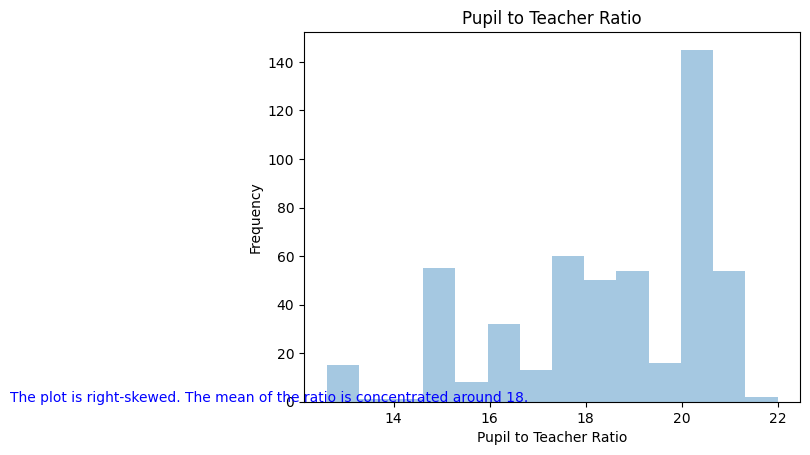

In [71]:
ax = sns.distplot(boston_df['PTRATIO'], kde = False)
ax.set_title("Pupil to Teacher Ratio")
ax.set_xlabel("Pupil to Teacher Ratio")
ax.set_ylabel("Frequency")
pyplot.text(6, 0.04, "The plot is right-skewed. The mean of the ratio is concentrated around 18.", fontsize=10, color='blue')

pyplot.show()

# Task 3: Use the appropriate tests to answer the questions provided.

For each of the following question
;* •	Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples* 
•	Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOV* 
•	Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlati* )
•	What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression anal
ysis)
Be s

- o:
1.	State your hypot- is.
2.	Use5α- 0.05
3.	Perform the test Sta- tics.
4.	State the conclusion fromhe test.



## 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)


H0: There is no difference in median value of houses bounded by the Charles river and not bounded by the river.\
H1: There is a significant difference in median value of houses bounded by the river and not bounded by the river.\
Assumption: significance level to be 0.05.

In [93]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')
# since the p-value is less than 0.05 we cannot assume equality of variance

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [94]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

<span style='color:#008000'>CONCLUSION: 
Since the p-value (0.00357) is less than significance level of 0.05, the null hypothesis (H0) holds invalid meaning that there exists significant difference in median value of houses bounded by the Charles river and not bounded by the river</span>.

## 2.Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

H0: There is no signficant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).  

H1: There is a signficant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).  

Assumption  

The significance level =0.05.  


In [105]:
from scipy.stats import f_oneway
age=boston_df['AGE']
medv=boston_df['MEDV']
f_statistic, p_value = f_oneway(age,medv)
                            
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)


F-Statistic: 1223.1740271875935
P-Value: 3.20946197250671e-176


<span style='color:#008000'>CONCLUSION: Since the p-value (3.209) is greater than significance level of 0.05, the null hypothesis fails to be rejected, meaning
that there exists NO significant difference in median value of houses for each proportion of owner occupied units built prior to 1940.</span>

## 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

H0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

H1There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per townE).

Assumption

The significance level =0.05.

In [106]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

<span style='color:#008000'>CONCLUSION: Since the p-value (7.913) is greater than significance level of 0.05, the null hypothesis fails to be rejected, meaning
that there exists NO significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.</span>

## 4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

H0: There is no impact of an additional weighted distance to the five Boston empolyment centers on the median value of owner occupied homes.

H1: There is a significant impact of an additional weighted distance to the five Boston empolyment centers on the median value of owner occupied homes.


Assumption

The significance level =0.05.

In [109]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        14:20:59   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style='color:#008000'>CONCLUSION: Since the p-value (0.00) is less than significance level of 0.05, the null hypothesis is rejected, meaning
that there is a significant impact of an additional weighted distance to the five Boston empolyment centers on the median value of owner occupied homes.</span>